##**TP N6 Clasificación con CNN**

Se usa el colab porque tiene más recursos, primero empezamos con librerías y montando del drive las imágenes.

In [23]:
import numpy as np
from matplotlib import pyplot as plt

Se usaron 461 imágenes de cada clase, las cuales fueron aumentadas a un total de 3000 cada clase con *augmentator.py* y luego normalizadas a 100x100 px con *reziser.py*

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


El objetivo es lograr diferenciar entre dos clases, **Superman** y **Batman**

In [25]:
import tensorflow as tf

Unzipeamos el dataset guardado en drive y cargamos datos (38.9MB)

In [ ]:
!unzip "/content/drive/My Drive/Colab Notebooks/datos.zip"

In [27]:
data = tf.keras.utils.image_dataset_from_directory('/content/datos', image_size=(100, 100))

Found 6000 files belonging to 2 classes.


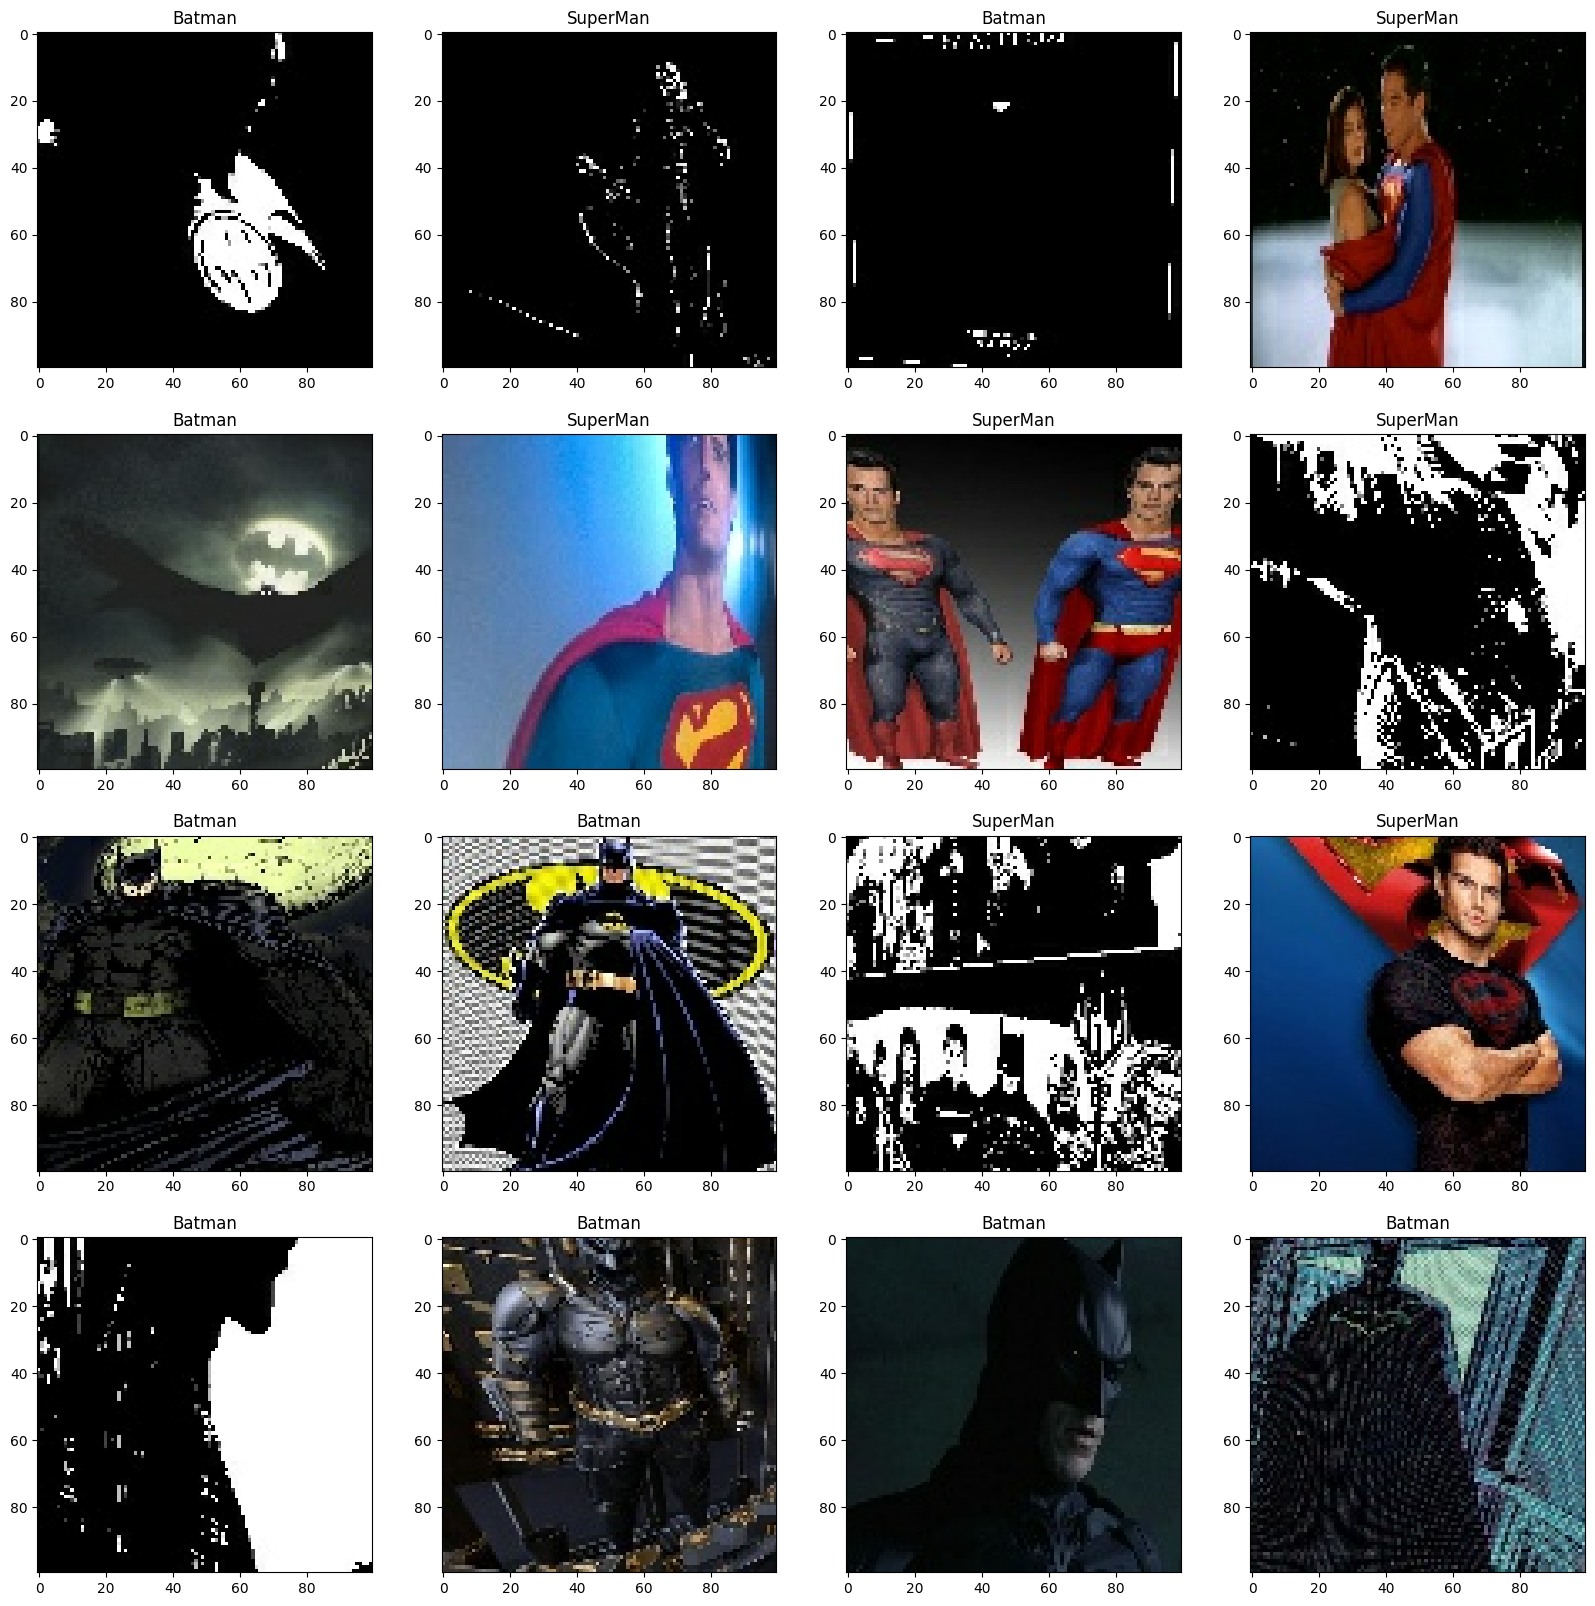

In [28]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20,20))
ax = axs.flatten()

components = ["Batman",
              "SuperMan",
              ]

for idx, img in enumerate(batch[0][:16]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(components[batch[1][idx]])

Escalamos los datos

In [29]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.00784314, 0.05490196],
          [0.        , 0.00784314, 0.05490196],
          [0.0627451 , 0.07058824, 0.11764706]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.00784314, 0.05490196],
          [0.        , 0.        , 0.04705882],
          [0.03137255, 0.03921569, 0.08627451]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.00784314, 0.04313726],
          [0.        , 0.        , 0.03529412],
          [0.        , 0.01176471, 0.04705882]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

Seteamos cuanto vamos a usar para el training y la validation

In [30]:
train_size = int(len(data)*.70)
val_size = int(len(data)*.30)

In [31]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)

## **CREACIÓN DEL MODELO**
Construimos el modelo

In [32]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras import models, layers

In [33]:
model = models.Sequential()
# 1st convolution layer: 32 filters of 3x3, ReLU activation function
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
# 1st max pooling layer: 2x2
model.add(layers.MaxPooling2D((2, 2)))
# 2nd convolution layer: 64 filters of 3x3, ReLU activation function
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# 2nd max pooling layer: 2x2
model.add(layers.MaxPooling2D((2, 2)))
# 3st convolution layer: 64 filters of 3x3, ReLU activation function
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

Le agregamos densidad, la última parte como son dos clases se ponen dos nodos

In [35]:
# Flatten layer
model.add(layers.Flatten())
# Dense layer
model.add(layers.Dense(64, activation='relu'))
# Output layer
model.add(layers.Dense(2, activation='softmax'))

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 flatten_2 (Flatten)         (None, 28224)            

## **ENTRENAMIENTO DEL MODELO**

In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train, epochs=10,
                    validation_data=val)

Epoch 1/10
131/131 [==============================] - 7s 39ms/step - loss: 0.5888 - accuracy: 0.6789 - val_loss: 0.5225 - val_accuracy: 0.7388
Epoch 2/10
131/131 [==============================] - 5s 34ms/step - loss: 0.4650 - accuracy: 0.7793 - val_loss: 0.4540 - val_accuracy: 0.7885
Epoch 3/10
131/131 [==============================] - 3s 25ms/step - loss: 0.4161 - accuracy: 0.8087 - val_loss: 0.4323 - val_accuracy: 0.7924
Epoch 4/10
131/131 [==============================] - 5s 39ms/step - loss: 0.3451 - accuracy: 0.8550 - val_loss: 0.4376 - val_accuracy: 0.7985
Epoch 5/10
131/131 [==============================] - 5s 36ms/step - loss: 0.2794 - accuracy: 0.8907 - val_loss: 0.5036 - val_accuracy: 0.7991
Epoch 6/10
131/131 [==============================] - 5s 35ms/step - loss: 0.2153 - accuracy: 0.9125 - val_loss: 0.5423 - val_accuracy: 0.8253
Epoch 7/10
131/131 [==============================] - 3s 25ms/step - loss: 0.1699 - accuracy: 0.9308 - val_loss: 0.5632 - val_accuracy: 0.8075

Cabe resaltar que con los recursos del colab se hace demasiado rápido a comparación con los recursos de mi compu, tambíen la cantidad de muestras influye más de lo que me imaginaba.

## **EVALUACIÓN DEL MODELO**
Evaluamos el modelo

In [38]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(val, verbose=2)

56/56 - 2s - loss: 0.9092 - accuracy: 0.8170 - 2s/epoch - 28ms/step


Se ve que se estabiliza abajo del 80% en la primera época, lo demás podría considerarse sobre entrenamiento.

## **TESTING DEL MODELO**
Probamos el modelo con dos imagenes diferentes, basandonos en la accuracy pero con un margen más permisivo

In [40]:
import cv2
#batman
img1 = cv2.imread('/content/drive/My Drive/Colab Notebooks/img_test_1.jpg')
#superman
img2 = cv2.imread('/content/drive/My Drive/Colab Notebooks/img_test_2.jpg')

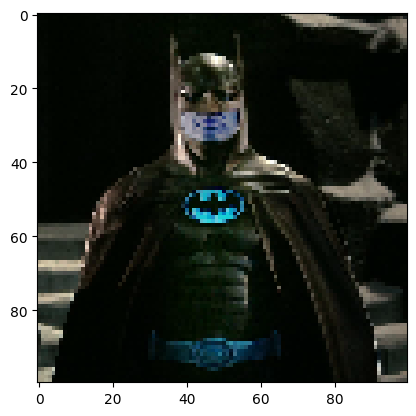

In [74]:
resize = tf.image.resize(img1, (100,100))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [75]:
IMG1 = model.predict(np.expand_dims(resize/255, 0))
print(IMG1)

temp = IMG1.reshape(-1)

if(temp[0] > 0.70):
  print("Batman")
if(temp[1] > 0.70):
  print("SuperMan")

1/1 [==============================] - 0s 66ms/step
[[0.99563736 0.00436267]]
Batman


In [76]:
resize = tf.image.resize(img2, (100,100))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [77]:
IMG2 = model.predict(np.expand_dims(resize/255, 0))
print(IMG2)

temp = IMG2.reshape(-1)

if(temp[0] > 0.70):
  print("Batman")
if(temp[1] > 0.70):
  print("SuperMan")

1/1 [==============================] - 0s 30ms/step
[[0.28233898 0.71766096]]
SuperMan
